<a href="https://colab.research.google.com/github/RabiaAmjad12/Internship-tasks/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(388)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,384,15622993,Boyd,709,Germany,Male,28,8,124695.72,2,1,0,145251.35,0
384,385,15689294,Onyemaechi,705,Germany,Male,44,3,105934.96,1,1,0,82463.69,0
385,386,15720910,Black,560,France,Female,66,9,0.00,1,1,1,15928.49,0
386,387,15721181,Oliver,611,Spain,Male,46,6,0.00,2,1,0,45886.33,0


In [ ]:
# Drop unnecessary columns (like RowNumber, CustomerId, Surname)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
# Check for nulls
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
# Label Encoding for Gender (binary column)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
# One-Hot Encoding for Geography (multi-category)
if 'Geography' in df.columns:
    df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [ ]:
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']              # Target (1 = Churned, 0 = Stayed)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1552   55]
 [ 213  180]]

Accuracy Score: 0.866

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



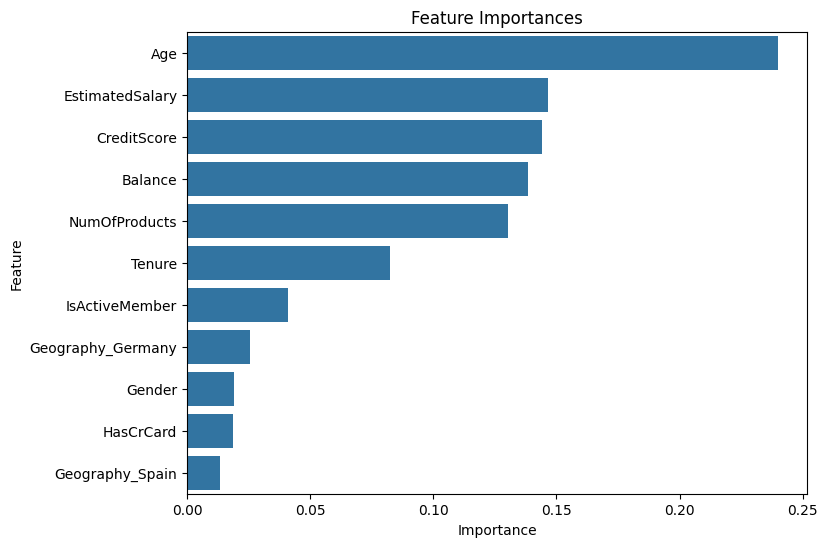

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame of feature importances
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importances')
plt.show()